In [2]:
!pip install sympy


     |████████████████████████████████| 5.8 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 512 kB 16.7 MB/s eta 0:00:01
  Created wheel for mpmath: filename=mpmath-1.1.0-py3-none-any.whl size=532239 sha256=ad0018c99830511391bd1111001810160d684fb2680c89897bdaeda4b4beab52
  Stored in directory: /Users/francl/Library/Caches/pip/wheels/e8/38/69/aa17553ad31f09ff5fa44c8a1a6c5b47e7c9261e9c7c16b9fb
Successfully built mpmath


In [3]:
import numpy as np
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
primes = list(sympy.primerange(2, 110000))
prime_to_column = {p:i for i, p in enumerate(primes)}

In [5]:
%%time
lil_matrix_rows = []
lil_matrix_data = []
for n in range(100000):
    prime_factors = sympy.primefactors(n)
    lil_matrix_rows.append([prime_to_column[p] for p in prime_factors])
    lil_matrix_data.append([1] * len(prime_factors))

CPU times: user 1.54 s, sys: 24.1 ms, total: 1.56 s
Wall time: 1.56 s


In [6]:
factor_matrix = scipy.sparse.lil_matrix((len(lil_matrix_rows), len(primes)), dtype=np.float32)
factor_matrix.rows = np.array(lil_matrix_rows)
factor_matrix.data = np.array(lil_matrix_data)
factor_matrix

/opt/anaconda3/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/opt/anaconda3/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


<100000x10453 sparse matrix of type '<class 'numpy.float32'>'
	with 266398 stored elements in LInked List format>

In [7]:
%%time
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(factor_matrix)

CPU times: user 9min 24s, sys: 14.7 s, total: 9min 39s
Wall time: 6min 3s


<AxesSubplot:>

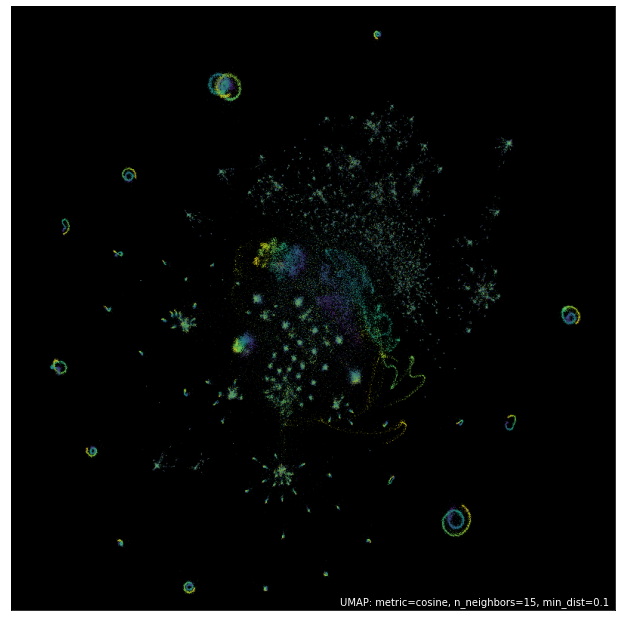

In [8]:
umap.plot.points(mapper, values=np.arange(100000), theme='viridis')